In [53]:
#Libraries to use
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#Machine Learning
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import chi2, mutual_info_classif
#label encoding
from sklearn.preprocessing import LabelEncoder
#logistic regresion
from sklearn.linear_model import LogisticRegression

In [54]:
Firedf = pd.read_csv("./FIREANAL_V2.csv")
Firedf.head()

,Area,Size_class,EstTotalAcres,Protected_Acres,HumanOrLightning,FO_LandOwnType,County,RegUseRestriction,Industrial_Restriction,DistrictCode,Month_ReportDate
0,EOA,B,0.75,0.75,Lightning,BLM,Grant,Reg Use Closure,Does Not Apply - Eastern OR,95,7
1,EOA,C,80.00,80.00,Lightning,Other Private,Union,Reg Use Closure,Does Not Apply - Eastern OR,97,8
2,SOA,A,0.10,0.10,Human,BLM,Jackson,Reg Use Closure,Lvl 3 Restricted Shutdown,71,8
3,NOA,A,0.01,0.01,Human,State,Benton,Closed Fire Season Lvl 1,Lvl 1 Fire Season Only,55,7
4,NOA,A,0.01,0.01,Lightning,Industrial,Polk,Reg Use Closure,Lvl 3 Restricted Shutdown,55,8


In [55]:
c = Firedf.drop(["EstTotalAcres", "Protected_Acres"], axis=1, inplace=True)
Firedf.head()

,Area,Size_class,HumanOrLightning,FO_LandOwnType,County,RegUseRestriction,Industrial_Restriction,DistrictCode,Month_ReportDate
0,EOA,B,Lightning,BLM,Grant,Reg Use Closure,Does Not Apply - Eastern OR,95,7
1,EOA,C,Lightning,Other Private,Union,Reg Use Closure,Does Not Apply - Eastern OR,97,8
2,SOA,A,Human,BLM,Jackson,Reg Use Closure,Lvl 3 Restricted Shutdown,71,8
3,NOA,A,Human,State,Benton,Closed Fire Season Lvl 1,Lvl 1 Fire Season Only,55,7
4,NOA,A,Lightning,Industrial,Polk,Reg Use Closure,Lvl 3 Restricted Shutdown,55,8


In [56]:
HotLabelFiredf = Firedf

In [57]:
for col in HotLabelFiredf.columns:
    le = LabelEncoder()
    HotLabelFiredf[col] = le.fit_transform(HotLabelFiredf[col])
HotLabelFiredf.head()

,Area,Size_class,HumanOrLightning,FO_LandOwnType,County,RegUseRestriction,Industrial_Restriction,DistrictCode,Month_ReportDate
0,0,1,1,2,12,4,0,10,6
1,0,2,1,9,31,4,0,11,7
2,2,0,0,2,15,4,3,5,7
3,1,0,0,13,1,1,1,3,6
4,1,0,1,5,28,4,3,3,7


In [79]:
D_Firedf = pd.get_dummies(HotLabelFiredf, prefix_sep='=', columns=["FO_LandOwnType", "Industrial_Restriction", "DistrictCode"])
D_Firedf.head()

,Area,Size_class,HumanOrLightning,County,RegUseRestriction,Month_ReportDate,FO_LandOwnType=0,FO_LandOwnType=1,FO_LandOwnType=2,FO_LandOwnType=3,...,DistrictCode=4,DistrictCode=5,DistrictCode=6,DistrictCode=7,DistrictCode=8,DistrictCode=9,DistrictCode=10,DistrictCode=11,DistrictCode=12,DistrictCode=13
0,0,1,1,12,4,6,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,2,1,31,4,7,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,0,0,15,4,7,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,1,1,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,28,4,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
# Assuming 'HumanOrLightning' is the target variable
labe = ['HumanOrLightning']
X = D_Firedf.drop(labe, axis=1)  # Features
y = D_Firedf['HumanOrLightning']  # Target variable

In [81]:
chi2_scores, chi2_pvalues = chi2(X, y)

In [82]:
mutual_info_scores = mutual_info_classif(X, y)

In [83]:
# Creating a DataFrame to display the results
feature_scores = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi2_scores, 'Chi2 p-value': chi2_pvalues, 'Mutual Info Score': mutual_info_scores})

# Sort the features by score (you can choose either Chi2 Score or Mutual Info Score)
sorted_features = feature_scores.sort_values(by='Chi2 Score', ascending=False)

# Print the sorted features
sorted_features.to_csv('Predicciones_dos_modelosV4.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


<Axes: >

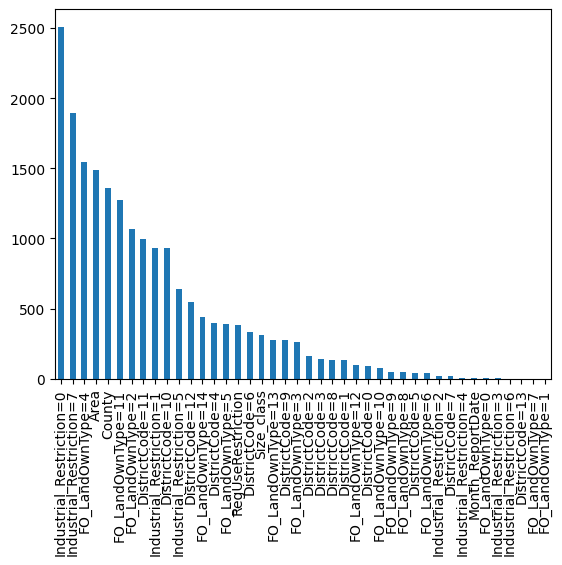

In [84]:
chi_values = pd.Series(chi2_scores, index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

<Axes: >

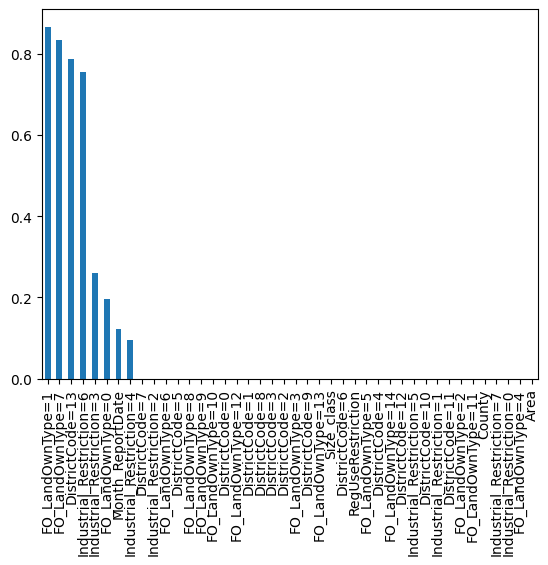

In [85]:
chi_values2 = pd.Series(chi2_pvalues, index=X.columns)
chi_values2.sort_values(ascending=False, inplace=True)
chi_values2.plot.bar()

<Axes: >

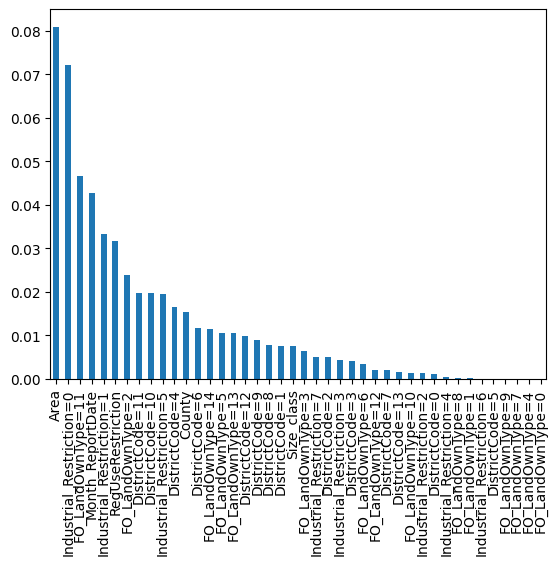

In [86]:
mutual_info_values = pd.Series(mutual_info_scores, index=X.columns)
mutual_info_values.sort_values(ascending=False, inplace=True)
mutual_info_values.plot.bar()